In [56]:
import scipy.optimize
import pandas
import numpy as np
import matplotlib.pyplot as plt

In [57]:
df = pandas.read_csv('Step1.csv')
ydata = df.T1.values
udata = df.Q1.values
time = df.Time.values

## I'm identifying the parameters of an ARX model using differential evolution.

In [58]:
# The objective function

def OF(x):
    a1, a2, b1, b2 = x
    ydev = ydata - ydata[0]
    udev = udata - udata[0]
    yt = []
    for i, it in enumerate(time):
        if i-1<0:
            y1 = ydev[0]
            u1 = udev[0]
        else:
            y1 = ydev[i-1]
            u1 = udev[i-1]
        if i-2<0:
            y2 = ydev[0]
            u2 = udev[0]
        else:
            y2 = ydev[i-2]
            u2 = udev[i-2]
        if i-3<0:
            y3 = ydev[0]
            u3 = udev[0]
        else:
            y3 = ydev[i-3]
            u3 = udev[i-3]
        yt.append(a1*y1 + a2*y2 + b1*u1 + b2*u2 )#+ a3*y3 + b3*u3)
    
    return sum((ydata - (yt+ydata[0]))**2)

In [59]:
# Differential Evolution.

bnds = ((-1,1), (-1,1), (-1,1), (-1,1))#, (-1,1), (-1,1))
par_DE = scipy.optimize.differential_evolution(OF, bounds=bnds)
par_DE

     fun: 14.951286752157444
     jac: array([0.01219327, 0.01218794, 0.02304148, 0.02317488])
 message: 'Optimization terminated successfully.'
    nfev: 3820
     nit: 61
 success: True
       x: array([ 5.06607185e-01,  4.85119632e-01, -3.15652833e-08,  5.05753857e-03])

In [60]:
# Comparison with minimize.

Xo = [0.9799079, 0.01606574, 0.001687, 0.00264688]
par_min = scipy.optimize.minimize(OF, Xo)
par_min

      fun: 14.951286752436344
 hess_inv: array([[ 6.14018390e-06,  5.27049872e-06, -7.21612001e-06,
         1.97101482e-06],
       [ 5.27049872e-06,  5.50951327e-06,  2.95768864e-06,
        -8.04365697e-06],
       [-7.21612001e-06,  2.95768864e-06,  2.01238501e-04,
        -1.99309405e-04],
       [ 1.97101482e-06, -8.04365697e-06, -1.99309405e-04,
         2.02410044e-04]])
      jac: array([-1.66893005e-06, -1.31130219e-06,  9.53674316e-06,  9.53674316e-06])
  message: 'Optimization terminated successfully.'
     nfev: 662
      nit: 11
     njev: 108
   status: 0
  success: True
        x: array([ 5.06607783e-01,  4.85119055e-01, -7.43814990e-09,  5.05749624e-03])

### Not sure why this optimization isn't successful, yet the same values for a1, a2, b1 and b2 are determined as in differential evolution.

## Calculating Predictions

In [61]:
# Step response
a1, a2, b1, b2 = par_DE.x

ydev = ydata - ydata[0]
udev = udata - udata[0]

    
y_difev = []
us = []
y_0 = y_1 = y_2 = ydev[0]
for i, ti in enumerate(time):
    u_1 = 0 if i < 1 else udev[i-1]
    u_2 = 0 if i < 2 else udev[i-2]
    y_2, y_1 = y_1, y_0
    y_0 = a1*y_1 + a2*y_2 + b1*u_1 + b2*u_2
    us.append([u_1, u_2])
    y_difev.append(y_0)

y_difev = np.array(y_difev + ydata[0]) 


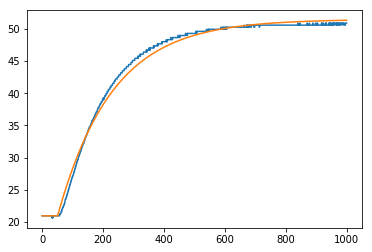

In [62]:
plt.plot(time, ydata)
plt.plot(time, y_difev)

### Now for other data:

In [63]:
rpi = pandas.read_csv('Rpi1_Q1_only.csv')
yrpi = rpi.T1.values
urpi = rpi.Q1.values
t_rpi = rpi.Time.values

doublet = pandas.read_csv('Doublet1_Q1_only.csv')
y_doublet = doublet.T1.values
u_doublet = doublet.Q1.values
t_doublet = doublet.Time.values

In [64]:
# The objective function for RPI

def OF_rpi(x):
    a1, a2, b1, b2 = x
    ydev = yrpi - yrpi[0]
    udev = urpi - urpi[0]
    yt = []
    for i, it in enumerate(time):
        if i-1<0:
            y1 = ydev[0]
            u1 = udev[0]
        else:
            y1 = ydev[i-1]
            u1 = udev[i-1]
        if i-2<0:
            y2 = ydev[0]
            u2 = udev[0]
        else:
            y2 = ydev[i-2]
            u2 = udev[i-2]
        if i-3<0:
            y3 = ydev[0]
            u3 = udev[0]
        else:
            y3 = ydev[i-3]
            u3 = udev[i-3]
        yt.append(a1*y1 + a2*y2 + b1*u1 + b2*u2 )#+ a3*y3 + b3*u3)
    
    return sum((yrpi - (yt+yrpi[0]))**2)

In [66]:
# Differential Evolution RPI.

bnds = ((-1,1), (-1,1), (-1,1), (-1,1))#, (-1,1), (-1,1))
par_rpi = scipy.optimize.differential_evolution(OF_rpi, bounds=bnds)
par_rpi

     fun: 15.963949604628832
     jac: array([-0.01643361, -0.01601812, -0.02497327, -0.02642864])
 message: 'Optimization terminated successfully.'
    nfev: 3385
     nit: 53
 success: True
       x: array([4.82256601e-01, 5.09291230e-01, 2.96792035e-04, 4.97119401e-03])

In [68]:
# RPI
a1, a2, b1, b2 = par_rpi.x

ydev = yrpi - yrpi[0]
udev = urpi - urpi[0]

    
y_difev_rpi= []
us = []
y_0 = y_1 = y_2 = ydev[0]
for i, ti in enumerate(time):
    u_1 = 0 if i < 1 else udev[i-1]
    u_2 = 0 if i < 2 else udev[i-2]
    y_2, y_1 = y_1, y_0
    y_0 = a1*y_1 + a2*y_2 + b1*u_1 + b2*u_2
    us.append([u_1, u_2])
    y_difev_rpi.append(y_0)

y_difev_rpi = np.array(y_difev_rpi + yrpi[0]) 


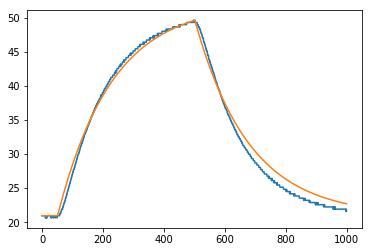

In [70]:
plt.plot(time, yrpi)
plt.plot(time, y_difev_rpi)

In [74]:
# The objective function for doublet

def OF_doublet(x):
    a1, a2, b1, b2 = x
    ydev = y_doublet - y_doublet[0]
    udev = u_doublet - u_doublet[0]
    yt = []
    for i, it in enumerate(time):
        if i-1<0:
            y1 = ydev[0]
            u1 = udev[0]
        else:
            y1 = ydev[i-1]
            u1 = udev[i-1]
        if i-2<0:
            y2 = ydev[0]
            u2 = udev[0]
        else:
            y2 = ydev[i-2]
            u2 = udev[i-2]
        if i-3<0:
            y3 = ydev[0]
            u3 = udev[0]
        else:
            y3 = ydev[i-3]
            u3 = udev[i-3]
        yt.append(a1*y1 + a2*y2 + b1*u1 + b2*u2 )#+ a3*y3 + b3*u3)
    
    return sum((y_doublet - (yt+y_doublet[0]))**2)

In [ ]:
# Differential Evolution Doublet.

bnds = ((-1,1), (-1,1), (-1,1), (-1,1))#, (-1,1), (-1,1))
par_doublet = scipy.optimize.differential_evolution(OF_doublet, bounds=bnds)
par_doublet

In [ ]:
# Doublet
a1, a2, b1, b2 = par_doublet.x

ydev = y_doublet - y_doublet[0]
udev = u_doublet - u_doublet[0]

    
y_difev_doub= []
us = []
y_0 = y_1 = y_2 = ydev[0]
for i, ti in enumerate(time):
    u_1 = 0 if i < 1 else udev[i-1]
    u_2 = 0 if i < 2 else udev[i-2]
    y_2, y_1 = y_1, y_0
    y_0 = a1*y_1 + a2*y_2 + b1*u_1 + b2*u_2
    us.append([u_1, u_2])
    y_difev_doub.append(y_0)

y_difev_doub = np.array(y_difev_doub + y_doublet[0]) 

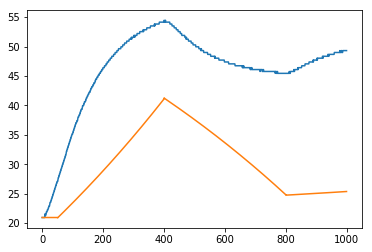

In [73]:
plt.plot(time, y_doublet)
plt.plot(time, y_difev_doub)